In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load your dataset
data = pd.read_csv('CORRELATIONS_YALA_POLONNARUWA.csv')  # Uncomment and modify to load your dataset

In [5]:
# Check the first few rows of the dataset
print(data.head())

   Year  Yala Total Rainfall  Yala Temp Average  Yala Average Of Max Temp  \
0  1993             362.5175          28.133203                 32.985520   
1  1994             306.2625          28.030333                 32.649815   
2  1995              94.4525          28.994030                 33.831949   
3  1996             191.6225          28.712471                 33.565705   
4  1997             410.1050          28.528950                 33.211416   

   Yala Highest Monthly  Average of Max Temp  Yala Average Of Min Temp  \
0                                  35.411042                 24.725498   
1                                  33.480403                 24.652745   
2                                  34.417167                 25.550209   
3                                  37.581532                 25.272910   
4                                  34.571292                 25.136288   

   Yala Lowest Monthly  Average of Min Temp  Actual Yield (kg/ha)  \
0                      

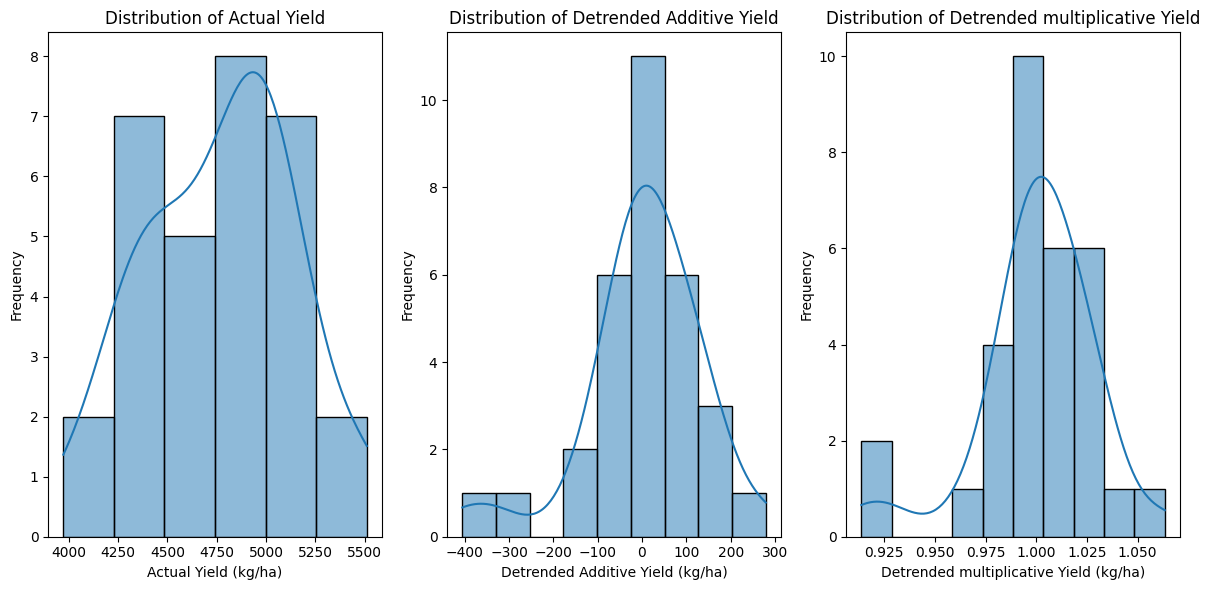

In [6]:
# Distribution plots for Actual Yield and Detrended Yield
plt.figure(figsize=(12, 6))

# Actual Yield Distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Actual Yield (kg/ha)'], kde=True)
plt.title('Distribution of Actual Yield')
plt.xlabel('Actual Yield (kg/ha)')
plt.ylabel('Frequency')

# Detrended Additive Yield Distribution
plt.subplot(1, 3, 2)
sns.histplot(data['Detrended Additive (kg/ha)'], kde=True)
plt.title('Distribution of Detrended Additive Yield')
plt.xlabel('Detrended Additive Yield (kg/ha)')
plt.ylabel('Frequency')


# Detrended Additive Yield Distribution
plt.subplot(1, 3, 3)
sns.histplot(data['Detrended Multiplicative (kg/ha)'], kde=True)
plt.title('Distribution of Detrended multiplicative Yield')
plt.xlabel('Detrended multiplicative Yield (kg/ha)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

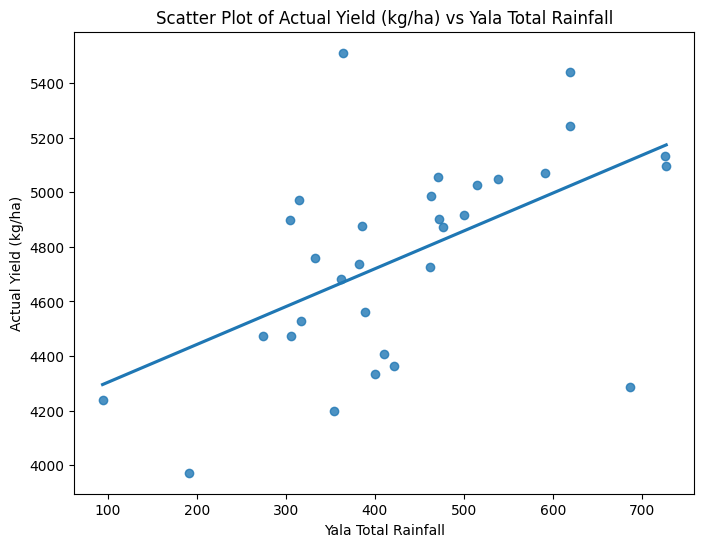

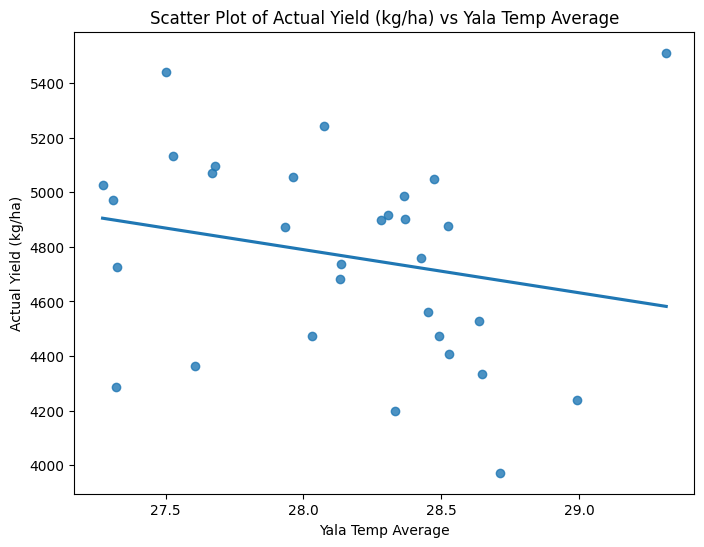

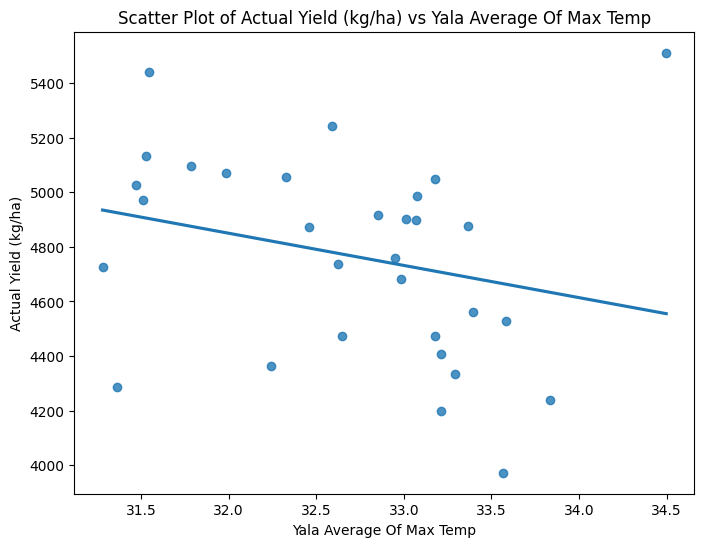

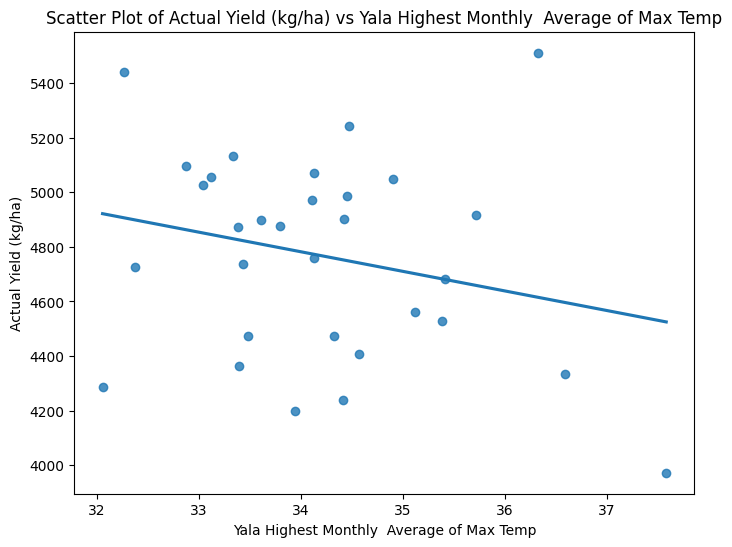

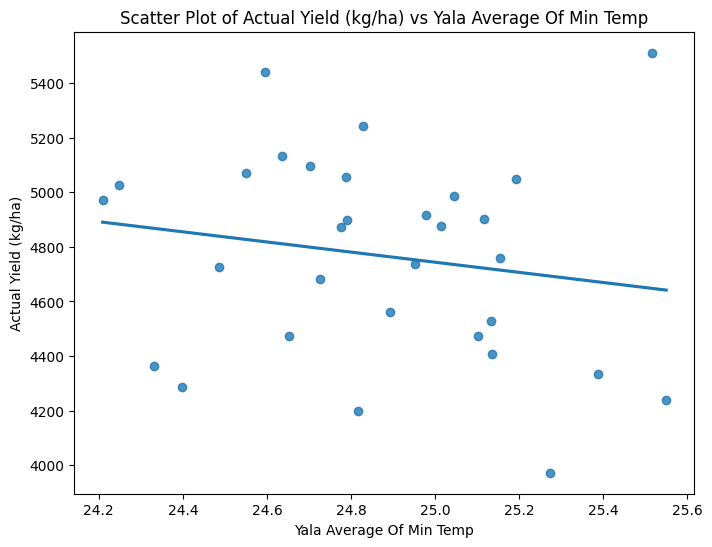

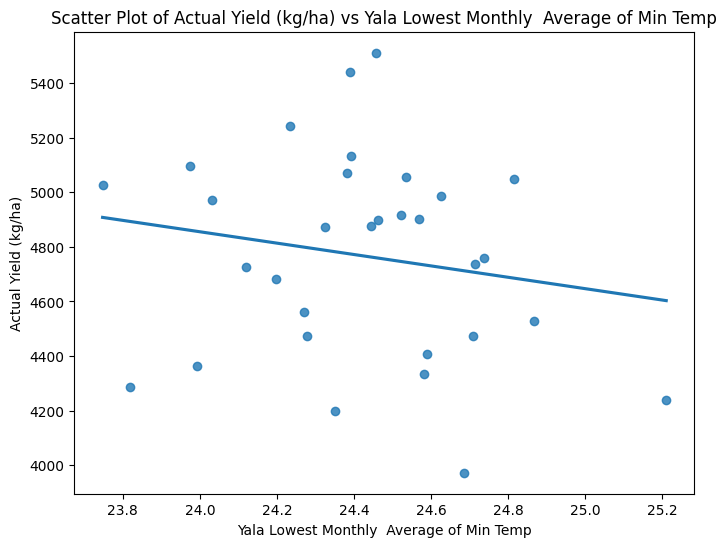

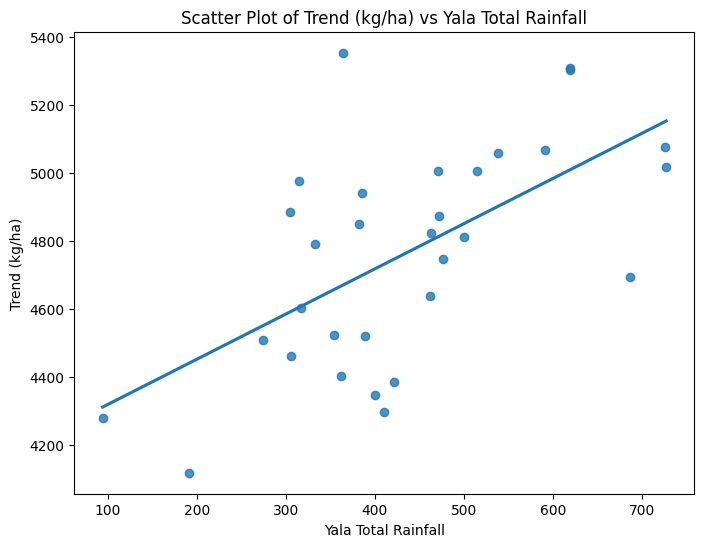

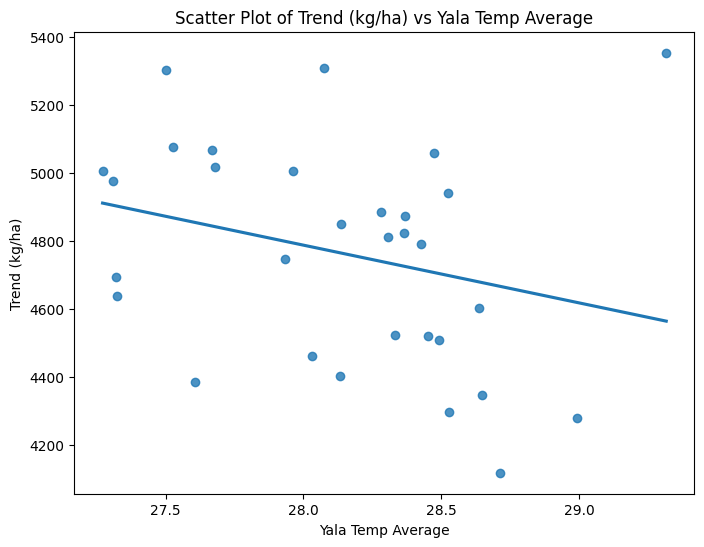

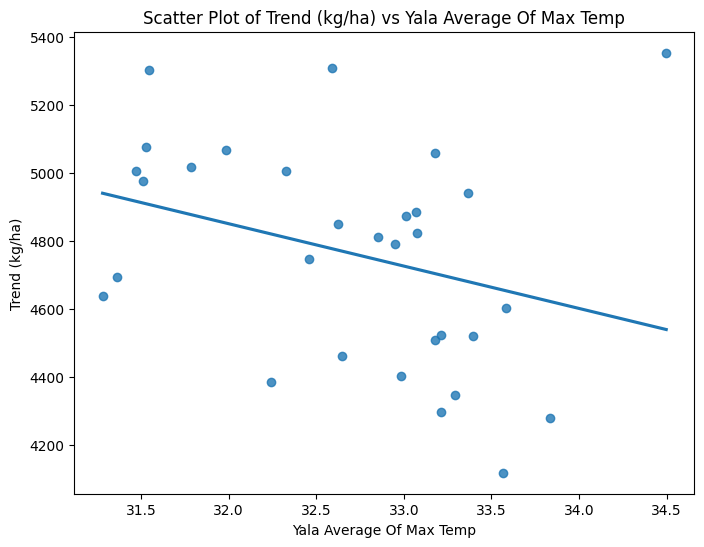

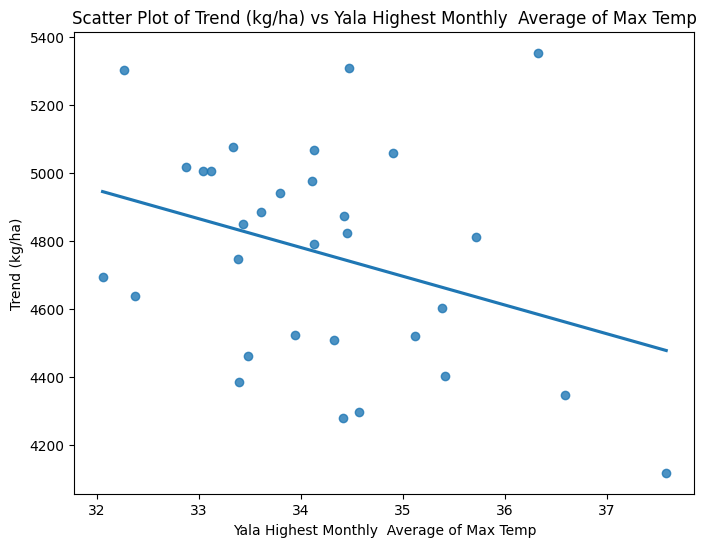

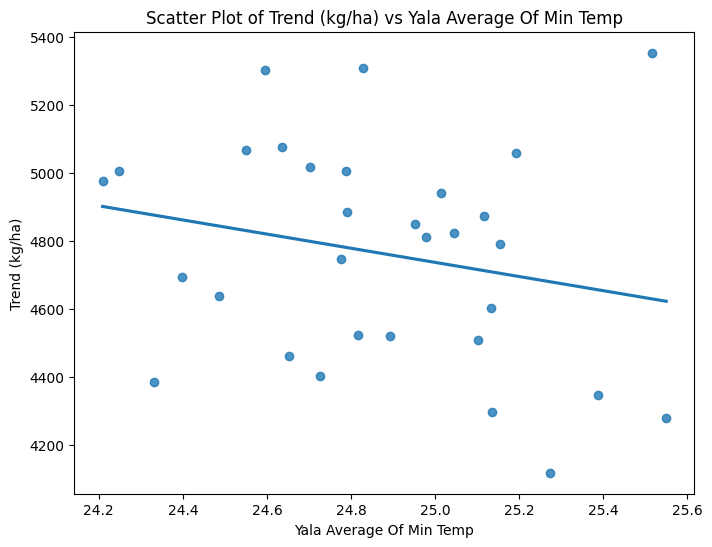

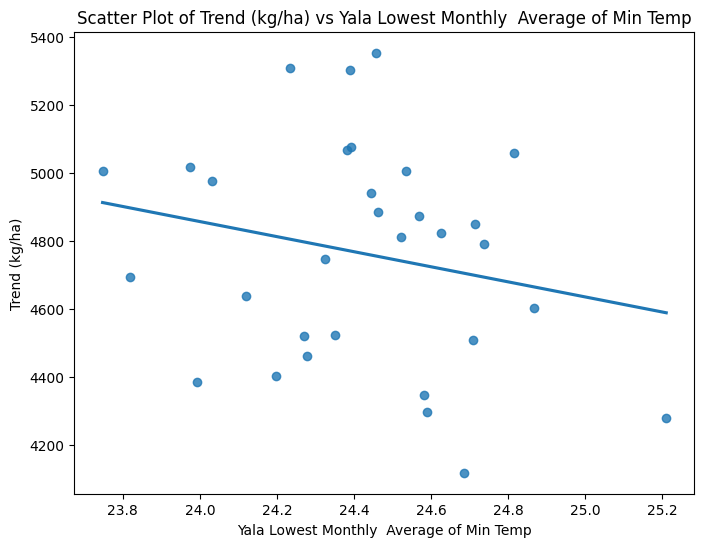

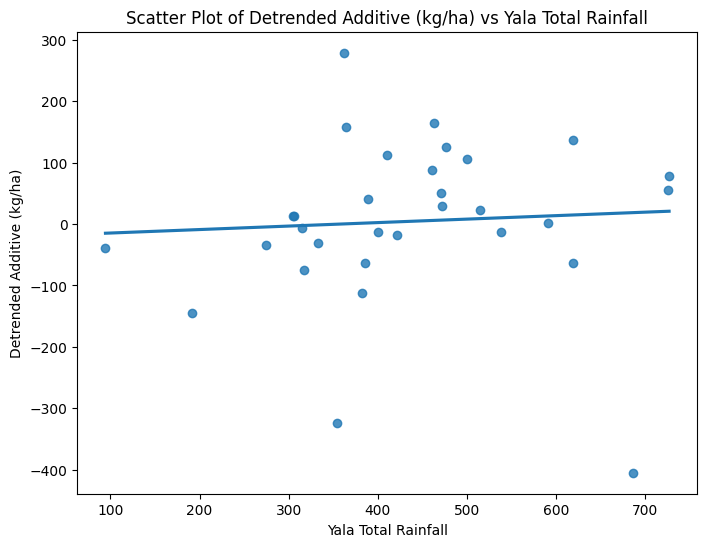

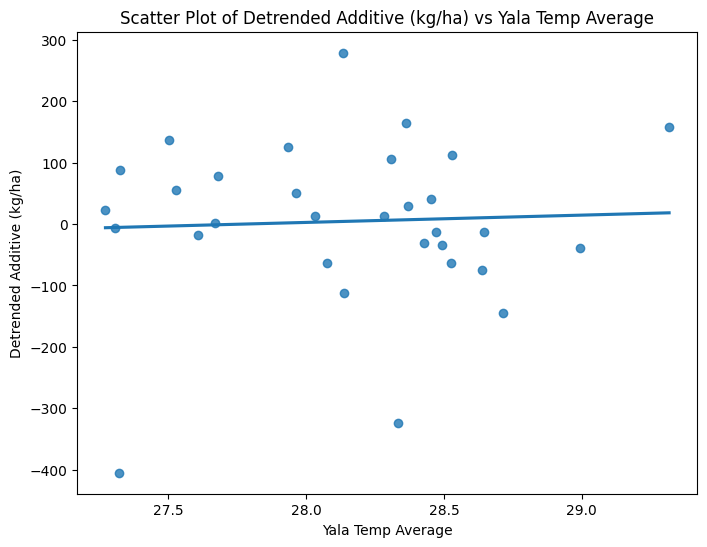

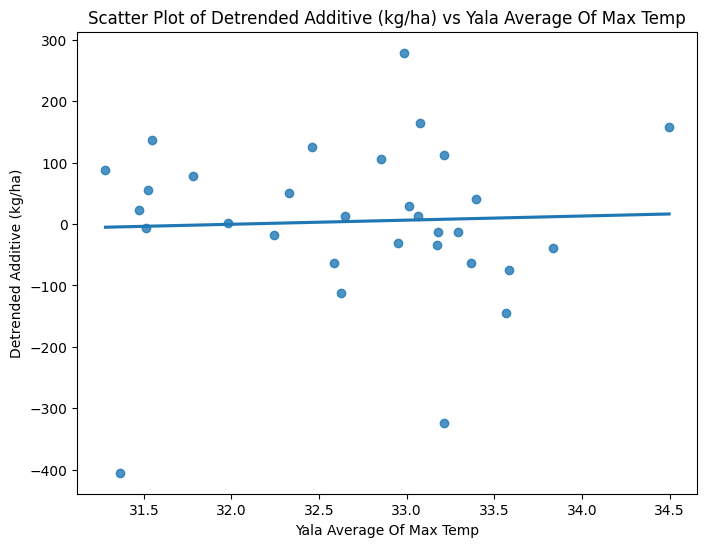

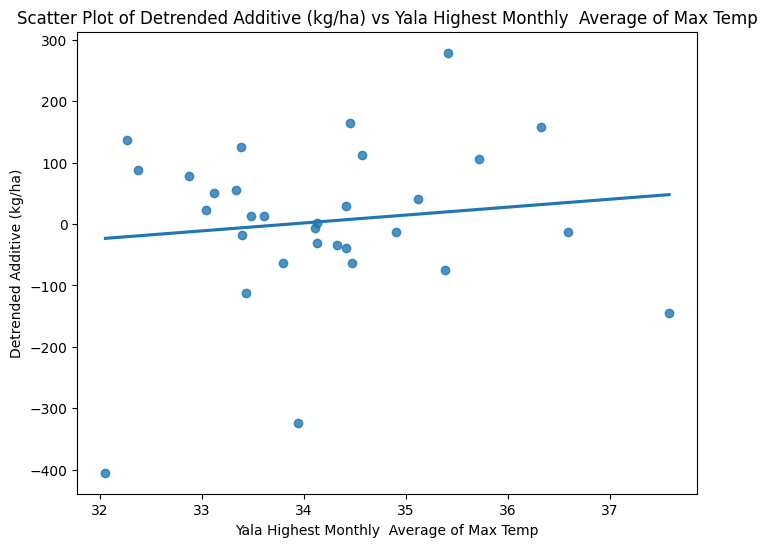

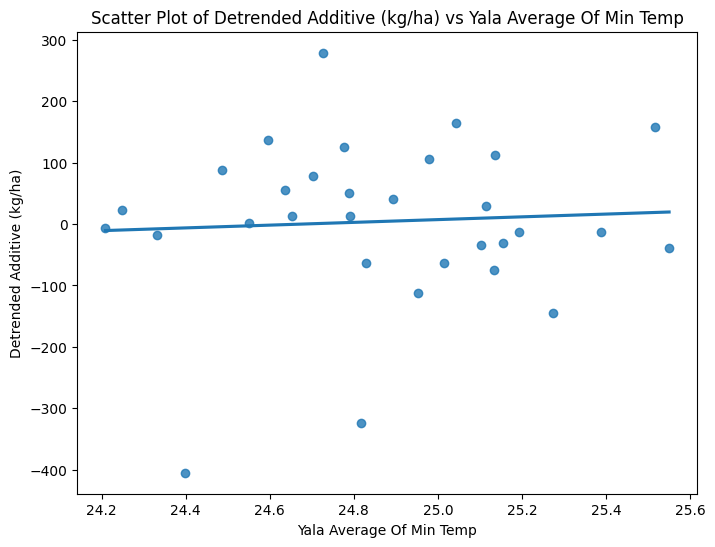

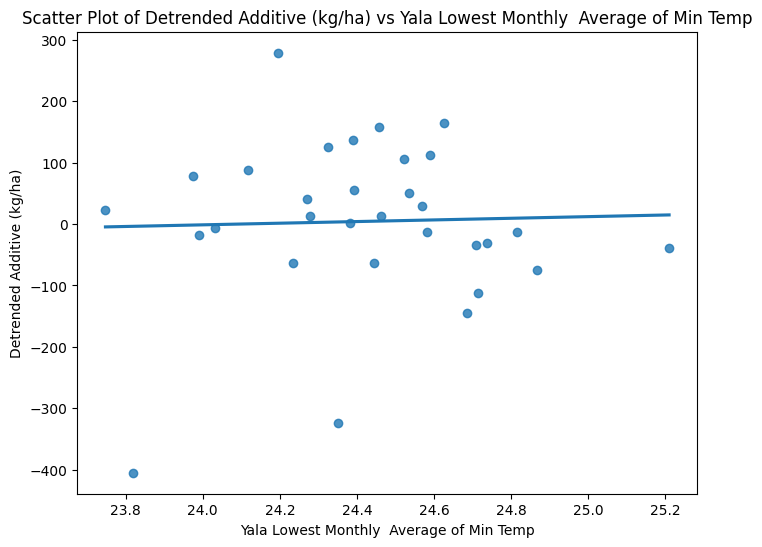

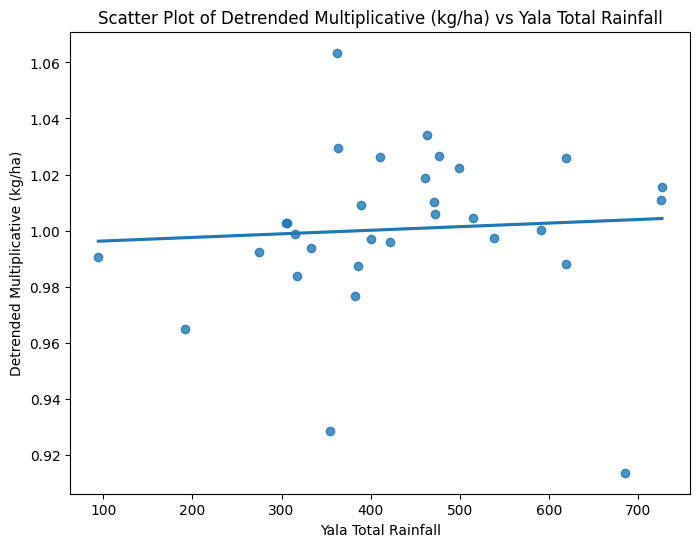

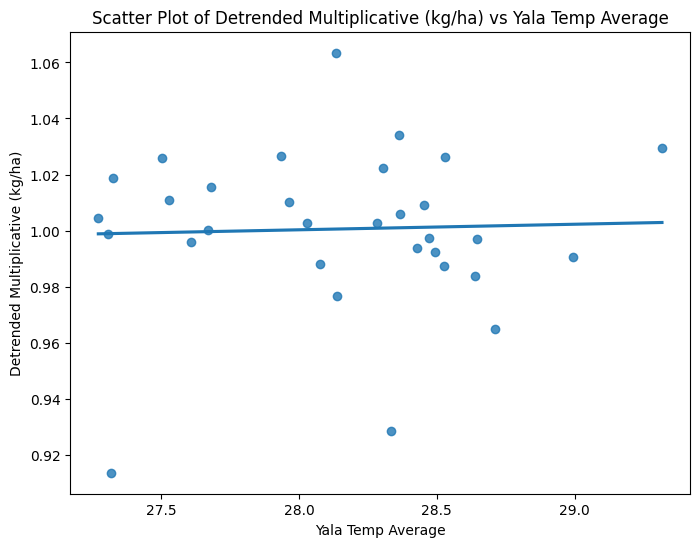

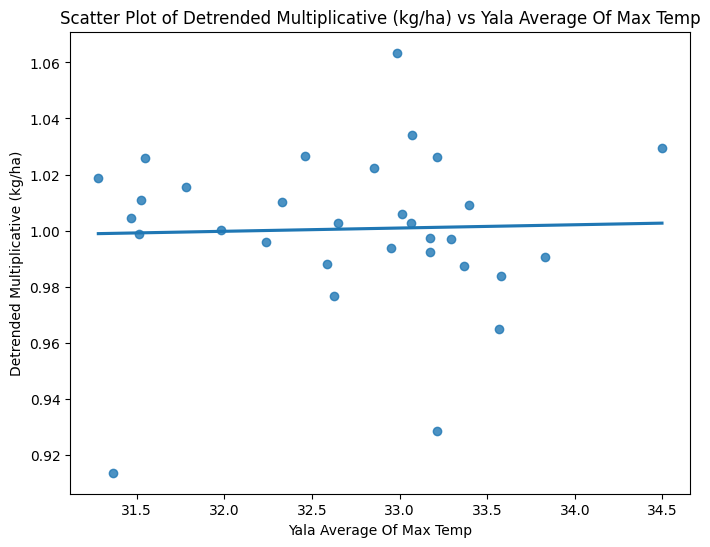

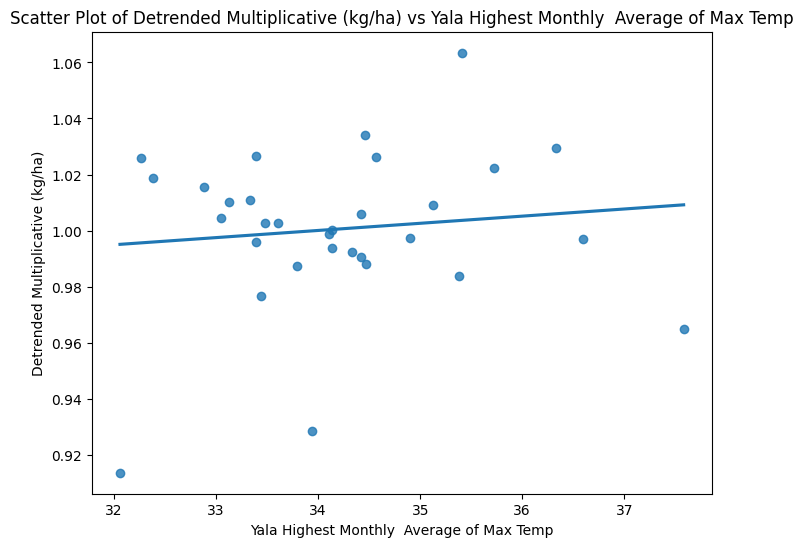

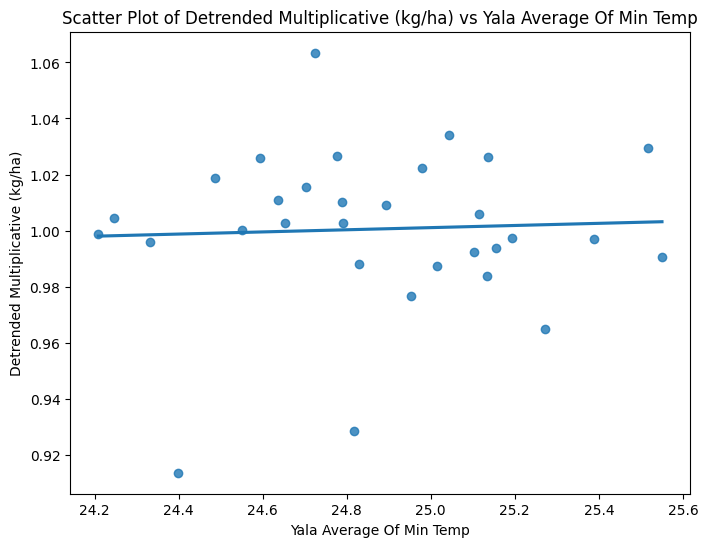

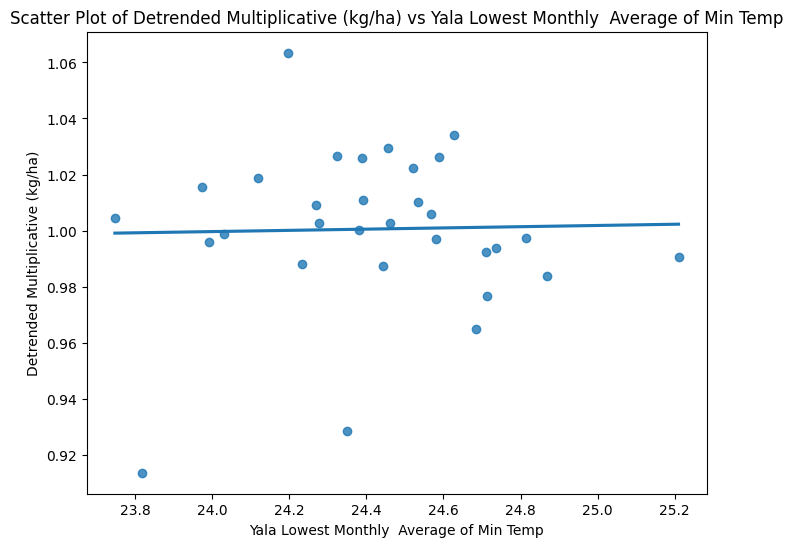

Correlation Matrix:
                                           Yala Total Rainfall  \
Yala Total Rainfall                                   1.000000   
Yala Temp Average                                    -0.604463   
Yala Average Of Max Temp                             -0.649375   
Yala Highest Monthly  Average of Max Temp            -0.476123   
Yala Average Of Min Temp                             -0.469866   
Yala Lowest Monthly  Average of Min Temp             -0.523517   
Actual Yield (kg/ha)                                  0.547114   
Trend (kg/ha)                                         0.604854   
Detrended Additive (kg/ha)                            0.062720   
Detrended Multiplicative (kg/ha)                      0.065515   

                                           Yala Temp Average  \
Yala Total Rainfall                                -0.604463   
Yala Temp Average                                   1.000000   
Yala Average Of Max Temp                            0.982487 

In [7]:
# Correlation analysis
weather_columns = ['Yala Total Rainfall', 'Yala Temp Average', 'Yala Average Of Max Temp', 'Yala Highest Monthly  Average of Max Temp','Yala Average Of Min Temp','Yala Lowest Monthly  Average of Min Temp']
yield_columns = ['Actual Yield (kg/ha)',
                 'Trend (kg/ha)',
                 'Detrended Additive (kg/ha)',
                 'Detrended Multiplicative (kg/ha)']

for yield_col in yield_columns:
    for weather_col in weather_columns:
        # Scatter plot with regression line
        plt.figure(figsize=(8, 6))
        sns.regplot(x=data[weather_col], y=data[yield_col], ci=None)
        plt.title(f'Scatter Plot of {yield_col} vs {weather_col}')
        plt.xlabel(weather_col)
        plt.ylabel(yield_col)

        plt.show()

# Optional: Display correlation matrix
correlation_matrix = data[weather_columns + yield_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)

In [8]:
import pandas as pd
from scipy.stats import pearsonr

# Calculate Pearson's correlation
for var in weather_columns:
    # Replace 'AverageYieldKgPERha' with the correct column name from your dataset
    # Assuming the correct column name is 'Actual Yield (kg/ha)' based on your previous code

    # Drop rows with NaN or inf in the relevant columns before calculating correlation
    valid_data = data[[var, 'Actual Yield (kg/ha)']].dropna().replace([np.inf, -np.inf], np.nan).dropna()

    correlation_coefficient, p_value = pearsonr(valid_data['Actual Yield (kg/ha)'], valid_data[var])
    print(f"Variable: {var}")
    print(f"  Pearson Correlation Coefficient (r): {correlation_coefficient:.2f}")
    print(f"  P-value: {p_value:.4f}")
    alpha = 0.05
    if p_value < alpha:
        print(f"  The correlation is statistically significant (p < {alpha}).")
        if correlation_coefficient > 0:
            print("  Positive linear relationship.")
        else:
            print("  Negative linear relationship.")
    else:
        print(f"  The correlation is not statistically significant (p >= {alpha}).")
    print()

Variable: Yala Total Rainfall
  Pearson Correlation Coefficient (r): 0.55
  P-value: 0.0014
  The correlation is statistically significant (p < 0.05).
  Positive linear relationship.

Variable: Yala Temp Average
  Pearson Correlation Coefficient (r): -0.22
  P-value: 0.2316
  The correlation is not statistically significant (p >= 0.05).

Variable: Yala Average Of Max Temp
  Pearson Correlation Coefficient (r): -0.26
  P-value: 0.1609
  The correlation is not statistically significant (p >= 0.05).

Variable: Yala Highest Monthly  Average of Max Temp
  Pearson Correlation Coefficient (r): -0.24
  P-value: 0.1868
  The correlation is not statistically significant (p >= 0.05).

Variable: Yala Average Of Min Temp
  Pearson Correlation Coefficient (r): -0.17
  P-value: 0.3508
  The correlation is not statistically significant (p >= 0.05).

Variable: Yala Lowest Monthly  Average of Min Temp
  Pearson Correlation Coefficient (r): -0.18
  P-value: 0.3383
  The correlation is not statistically s

In [9]:
import pandas as pd
from scipy.stats import pearsonr

# Calculate Pearson's correlation
for var in weather_columns:
    # Drop rows with NaN or inf in the relevant columns before calculating correlation
    # Include 'Trend (kg/ha)' in the columns used to create valid_data
    valid_data = data[[var, 'Actual Yield (kg/ha)', 'Trend (kg/ha)']].dropna().replace([np.inf, -np.inf], np.nan).dropna()

    correlation_coefficient, p_value = pearsonr(valid_data['Trend (kg/ha)'], valid_data[var])
    print(f"Variable: {var}")
    print(f"  Pearson Correlation Coefficient (r): {correlation_coefficient:.2f}")
    print(f"  P-value: {p_value:.4f}")
    alpha = 0.05
    if p_value < alpha:
        print(f"  The correlation is statistically significant (p < {alpha}).")
        if correlation_coefficient > 0:
            print("  Positive linear relationship.")
        else:
            print("  Negative linear relationship.")
    else:
        print(f"  The correlation is not statistically significant (p >= {alpha}).")
    print()

Variable: Yala Total Rainfall
  Pearson Correlation Coefficient (r): 0.60
  P-value: 0.0003
  The correlation is statistically significant (p < 0.05).
  Positive linear relationship.

Variable: Yala Temp Average
  Pearson Correlation Coefficient (r): -0.27
  P-value: 0.1355
  The correlation is not statistically significant (p >= 0.05).

Variable: Yala Average Of Max Temp
  Pearson Correlation Coefficient (r): -0.31
  P-value: 0.0849
  The correlation is not statistically significant (p >= 0.05).

Variable: Yala Highest Monthly  Average of Max Temp
  Pearson Correlation Coefficient (r): -0.33
  P-value: 0.0688
  The correlation is not statistically significant (p >= 0.05).

Variable: Yala Average Of Min Temp
  Pearson Correlation Coefficient (r): -0.22
  P-value: 0.2254
  The correlation is not statistically significant (p >= 0.05).

Variable: Yala Lowest Monthly  Average of Min Temp
  Pearson Correlation Coefficient (r): -0.22
  P-value: 0.2383
  The correlation is not statistically s